### **Importing Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
from tqdm import tqdm
import math

### **Mounth Path**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path='/content/drive/MyDrive/CVPR/Animals'

Mounted at /content/drive


In [3]:
categories = os.listdir(data_path)
print(categories)

['Jaguar', 'Lion', 'Leopard', 'Tiger', 'Cheetah']



# **Data Preprocessing**

100%|██████████| 38/38 [00:10<00:00,  3.71it/s]


170


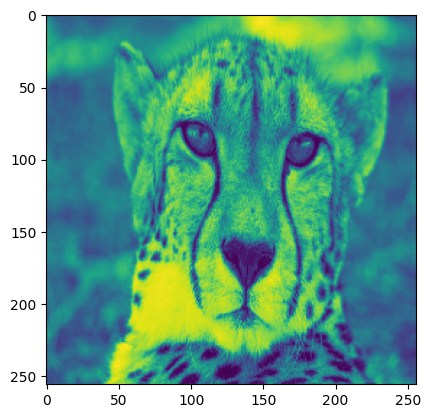

In [4]:
train_data = []

for c in categories:
    # Create the path to the current category folder
    path = os.path.join(data_path, c)

    # Get the index of the current category (used as a class label)
    class_index = categories.index(c)

    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img))

        # Convert the image to grayscale
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)

        # Resize the image to a fixed size (256x256)
        img_arr = cv2.resize(img_arr, (256, 256))

        # Append the image array and its class label as a tuple to the training data list
        train_data.append([img_arr, class_index])
        plt.imshow(img_arr)
print(len(train_data))


## **Image Shuffling**

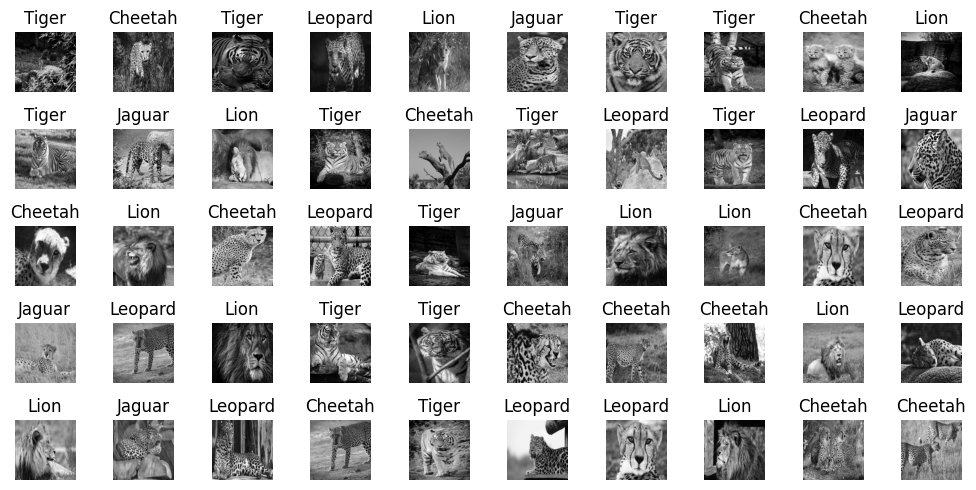

In [5]:
# Shuffle the training data to ensure randomness
random.shuffle(train_data)

# Showing the first 50 images(Display images with their labels)
plt.figure(figsize=(10, 5))
for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.title(categories[train_data[i][1]])
  plt.axis('off')

plt.tight_layout()

plt.show()


There are in total 170 images. So, 34 images in each fold and in total, there are 5 folds.

In [6]:
f0=train_data[0:34]
f1=train_data[34:68]
f2=train_data[68:102]
f3=train_data[102:136]
f4=train_data[136:170]

# Verify the sizes of each split
print(f"f0 size: {len(f0)}")
print(f"f1 size: {len(f1)}")
print(f"f2 size: {len(f2)}")
print(f"f3 size: {len(f3)}")
print(f"f4 size: {len(f4)}")

f0 size: 34
f1 size: 34
f2 size: 34
f3 size: 34
f4 size: 34


In [7]:
accuracy_l2=[]
K = list(range(1, 31))

### **Model Building**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function to calculate Euclidean (L2) distance
def l2_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the label using k-NN
def predict_knn(train, test_sample, k):
    distances = []
    for t in train:
        dist = l2_distance(t[0], test_sample[0])  # Compute L2 distance
        distances.append((dist, t[1]))  # Append distance and label
    # Sort by distance and select top-k
    top_k = sorted(distances, key=lambda x: x[0])[:k]
    top_k_labels = [label for _, label in top_k]
    # Predict the most common label
    return max(set(top_k_labels), key=top_k_labels.count)

folds = [f0, f1, f2, f3, f4]

# List of k values to test
k_values = list(range(1, 31))

# Perform 5-Fold Cross-Validation
fold_accuracies = []
for k in k_values:
    fold_accuracy = []
    for i in range(len(folds)):
        # Split into training and validation sets
        validation = folds[i]
        train = [item for j, fold in enumerate(folds) if j != i for item in fold]

        correct = 0
        # Validate the model on the current fold
        for sample in tqdm(validation, desc=f"Fold {i+1}, k={k}"):
            pred_label = predict_knn(train, sample, k)
            if pred_label == sample[1]:  # Check if the prediction matches the label
                correct += 1
        # Calculate accuracy for the current fold
        accuracy = (correct / len(validation)) * 100
        fold_accuracy.append(accuracy)

    # Append accuracies for the current k
    fold_accuracies.append(fold_accuracy)

# Calculate average accuracy for each k
average_accuracies = [np.mean(acc) for acc in fold_accuracies]



Fold 5, k=30: 100%|██████████| 34/34 [00:00<00:00, 92.91it/s]


### **Visualization of Results**

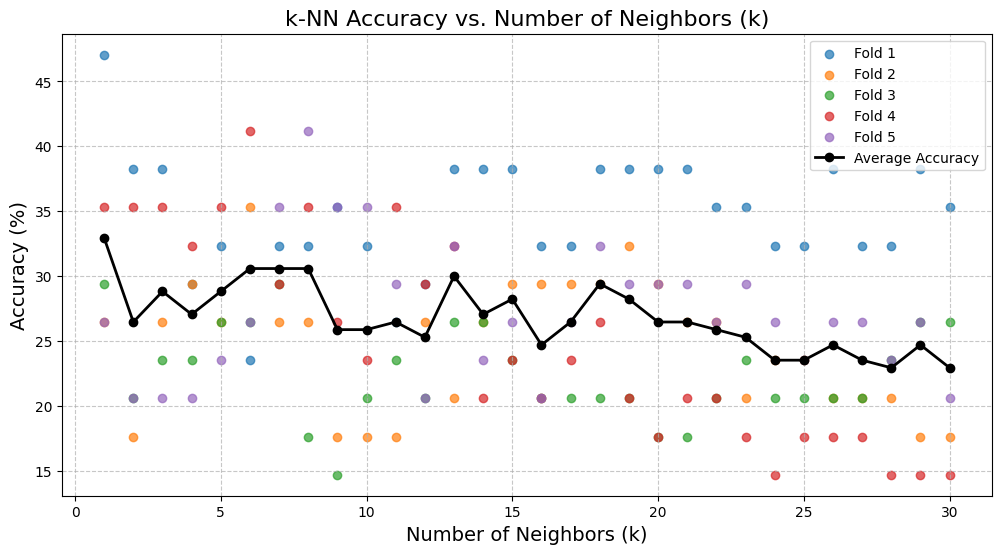

In [9]:
plt.figure(figsize=(12, 6))

# Plot accuracies for each fold
for i in range(len(folds)):
    fold_data = [acc[i] for acc in fold_accuracies]
    plt.scatter(k_values, fold_data, label=f'Fold {i+1}', alpha=0.7)

# Plot the average accuracy across folds
plt.plot(k_values, average_accuracies, label='Average Accuracy', color='black', linestyle='-', linewidth=2, marker='o')

plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('k-NN Accuracy vs. Number of Neighbors (k)', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()